In [1]:
import os
import cv2
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
model = tf.keras.models.load_model('ccn_miko_model.h5') 

#this is used to load the saved model we can use tf.saved_model.save(model, 'saved_model') to Save the model as a SavedModel
# Load the SavedModel loaded_model = tf.saved_model.load('saved_model')

In [20]:
img = image.load_img('D:\pixiv\illust_91918831_20221019_133522.jpg',target_size=(300,300))
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
val = model.predict(X)

1/1 [==============================] - 0s 110ms/step


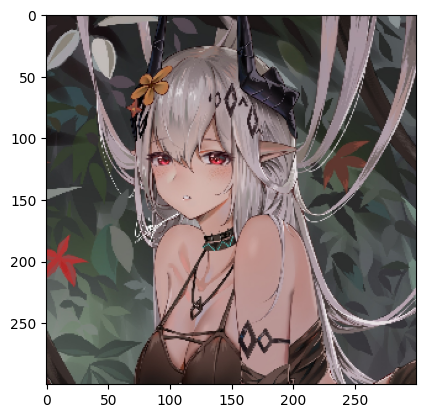

In [21]:
plt.imshow(img)

In [23]:
print(val)
#val is 1 for image of Miko it is 0 for rest.

[[0.]]


In [ ]:
#This command is to put files from pixiv to Miko folder 
source_folder = r"D:\pixiv\\"
destination_folder = r"D:\Predicted_Miko\\"
i=0
for images in os.listdir(source_folder):
    # construct full file path
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        source = source_folder + images
        destination = destination_folder + images
        print(images)
        img = image.load_img(source,target_size=(400,400))
        print("loaded")
        i=i+1
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        val = model.predict(X)
        if val == 1 :
            shutil.copy(source, destination)
            print('copied', images)
            os.remove(source)
            print('deleted')

In [ ]:
#This command is to put files from Miko floder to pixiv 
source_folder = r"D:\Predicted_Miko\\"
destination_folder = r"D:\pixiv\\"
for images in os.listdir(source_folder):
    # construct full file path
    if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
        source = source_folder + images
        destination = destination_folder + images
        print(images)
        img = image.load_img(source,target_size=(300,300))
        print("loaded")
        X = image.img_to_array(img)
        X = np.expand_dims(X,axis=0)
        val = model.predict(X)
        if val == 0 :
            shutil.copy(source, destination)
            print('copied', images)
            os.remove(source)
            print('deleted')